# COMP 7150 Midterm Exam

WRITE YOUR NAME HERE: Hasan Mashrique

---

The instructor will explictly review these policies at the beginning of the exam. If you have questions about the exam policy, you must ask the instructor for clarification.

Exam policy:
+ You may view materials that are available on Canvas.
+ To analyze or visualize data, you may only use code that we have discussed in this course.  Using code or methods that have not been taught is considered cheating.  There are exceptions that I may allow. But you will have to get approvals from me first. 
+ You may not view other materials (code/methodologies/etc.) from other sources. You may not get help from anyone other than the instructor. A violation is considered cheating.  Cheating results in failing the course (getting an F).

Grading policy: to get most of the points on each problem, follow this guidline:
+ If the problem ask question(s), you must answer the question(s) in English.  Further, you will need perform an analysis to justify your answer.
+ Your analysis consists of code and possibly reasoning to support your answer.
+ If I ask for specific types of analyses or procedures, to get points, you have to use those.  If I do not ask for specific technical procedures, you are open to use anything we've discussed in this course.

There are 9 questions.  Each is worth 12 points.  Anything over 100 points is bonus.

---


In this exam, you will use the "Mall_Customers" dataset.

In [1]:
import pandas

customers = pandas.read_csv('../Datasets/Mall_Customers.csv')
customers.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
29,30,Female,23,29,87
78,79,Female,23,54,52
164,165,Male,50,85,26
15,16,Male,22,20,79


---

**Problem 1**

Visualize the distribution of annual incomes.



In [2]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from seaborn import relplot,displot,catplot
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
customers.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### Solution 1:

The distribution of the Annual income is shown with the displot. 

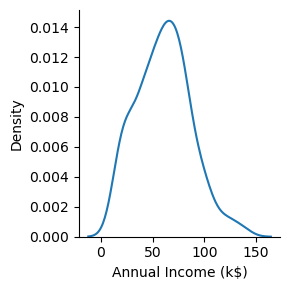

In [4]:
displot(data=customers, x='Annual Income (k$)', kind='kde', height=3)

plt.show()

---

**Problem 2**

Is the distribution of annual incomes normal?  Explain both visually and by using a statistical test.

### Solution 2:

The distribution of the annual incomes can be visually tested via a `QQplot` and statistically tested via a `Shapiro` test.

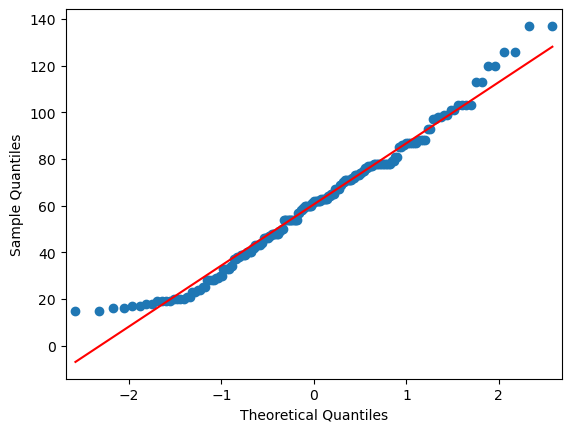

p value:  0.0035369861871004105


In [5]:
from scipy.stats import shapiro
from statsmodels.api import qqplot

def test_for_normality(data):
    
    shapiro_test = shapiro(data)
    fig = qqplot(data, line='s')
    plt.show()
    print("p value: ", shapiro_test.pvalue)

    
test_for_normality(customers['Annual Income (k$)'])    

From the QQplot, we can that lot of the datapoints are not aligned with the red line, suggesting not a normal 
distribution. Also from the Shapiro test, the p-value is very low, 0.0035. Since its lower than the  conventional threshold (<0.05), we can  say the `annual income` is not normally distributed.

---

**Problem 3**

What is the test hypothesis of the t-test?  Explain your conclusion when a t-test between two series A and B returns a p-value of 0.003.

### Solution 3:

The test hypothesis of the t-test is that the means of the two poputation values we are comparing is equal. The data is also assumed to be normally distributed. 

If we do a t-test between two series A and B and we get a return of p-value=0.003, this means that the probability that means of the two series A and B are equal is 0.003. This probability is very low, thus in this case we can reject the hypothesis that  mean of A and B are equal.

---

**Problem 4**

Create a dataframe that contains all data points with gender "Male", and another dataframe that contains all data points with gender "Female".


## Solution 4:

In [6]:
customers.sample(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
123,124,Male,39,69,91
178,179,Male,59,93,14
74,75,Male,59,54,47


In [7]:
male_query= (customers['Gender']=='Male')
female_query= (customers['Gender']=='Female')

In [8]:
male_data= customers[male_query]

#88
male_data.head() 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
8,9,Male,64,19,3
10,11,Male,67,19,14
14,15,Male,37,20,13


In [9]:
female_data= customers[female_query]

#112
female_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


In [10]:
len(customers)

200

---

**Problem 5**

Is there a significant difference between males' and females' annual incomes?


### Solution 5:

In [11]:
male_income= male_data['Annual Income (k$)']
female_income= female_data['Annual Income (k$)']

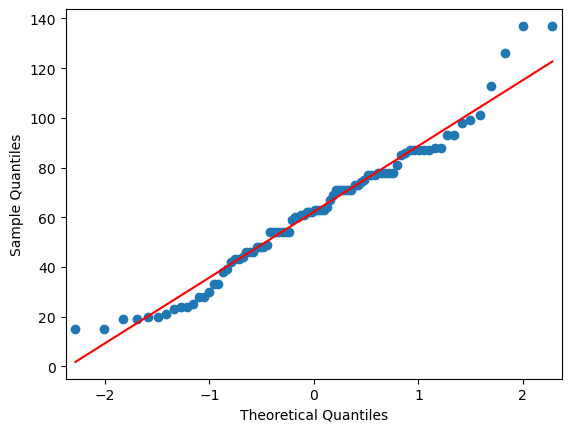

p value:  0.04253113269805908


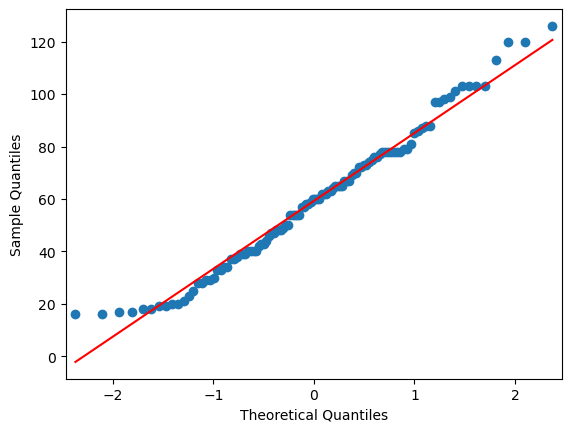

p value:  0.043284278362989426


In [12]:
# def test_for_normality(data):
    
#     shapiro_test = shapiro(data)
#     fig = qqplot(data, line='s')
#     plt.show()
#     print("p value: ", shapiro_test.pvalue)

    
test_for_normality(male_income)
test_for_normality(female_income)


We see that both the p-values(0.043 and 0.043) are < 0.05. So, the data are not normally distributed for both and female income. In this case  we will use a ManwhittneyU test to test for significance, which is used if the data is not normal. 

In [13]:
from scipy.stats import mannwhitneyu
# from scipy.stats import ttest_ind


# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(male_income, female_income)

print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 5260.0
P-value: 0.41440053689269707


From the p-value, we can see that it is higher than our threshold(>0.05), so we can say that there is no statistical significance. 

We can say that there is no statistical significance between male and female income and they can be equal.

---

**Problem 6**

Given this dataframe:
```python
customers = pandas.read_csv('../Datasets/Mall_Customers.csv')
```

Create a new column in this dataframe called `income_class`, based on this definition:
+ `low` - if the annual income is less than 40k.
+ `middle` - if the annual income is between 40k and 70k.
+ `high` - if the annual income is more than 70k.

### Solution 6:

In [14]:
customers.sample(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
11,12,Female,35,19,99
90,91,Female,68,59,55
103,104,Male,26,62,55


In [15]:
def income_category(income):
    
    if income<40:
        group='low'
    elif (income>=40 and income<=70):
        group='middle'
    elif income>70:
        group='high'
    
    return group
    

    
    
customers['Income_Group'] = customers['Annual Income (k$)'].apply(income_category)   

In [16]:
customers.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_Group
12,13,Female,58,20,15,low
193,194,Female,38,113,91,high
153,154,Female,38,78,76,high
103,104,Male,26,62,55,middle
181,182,Female,32,97,86,high


---

**Problem 7**

A person with a high spending score more likely spends the money to buy things.  The average spending scores of low-income, middle-income, and high-income people are actually very similar (around 50).

But there are similarities and differences beyond this average value.

Compare the similarities and differences in spending between these three groups of people. 

## Solution 7:

In [17]:
customers.groupby("Income_Group")[['Spending Score (1-100)','Age']].mean()

,Spending Score (1-100),Age
Income_Group,,
high,50.189189,36.716216
low,49.739130,35.369565
middle,50.475000,42.825000


Even though the mean spending score is similar, the age groups are a bit different for the income groups.
Middle income people are older in age than the other 2 groups, which are similar.

In [29]:
grpdata=customers.groupby("Income_Group")

In [31]:
for grp,data in grpdata:
    print(grp,"\n",data['Gender'].value_counts())

high 
 Male      37
Female    37
Name: Gender, dtype: int64
low 
 Female    28
Male      18
Name: Gender, dtype: int64
middle 
 Female    47
Male      33
Name: Gender, dtype: int64


In [19]:
customers.groupby("Income_Group")[['Annual Income (k$)']].mean()

,Annual Income (k$)
Income_Group,
high,87.459459
low,26.304348
middle,55.375000


The customer count is not similar between the groups, specially there is a big gap between low and other two groups.

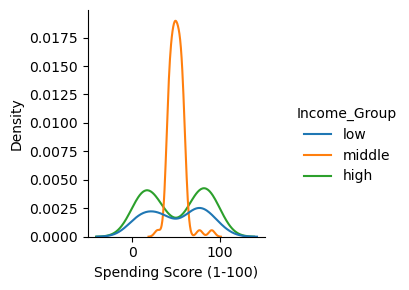

In [20]:
displot(data=customers, x='Spending Score (1-100)', hue='Income_Group',kind='kde', height=3)

plt.show()

From their distribution, we can see that the middle income group is more dense than the other other groups. So, their distribution is looking more normal than the high and low income groups.

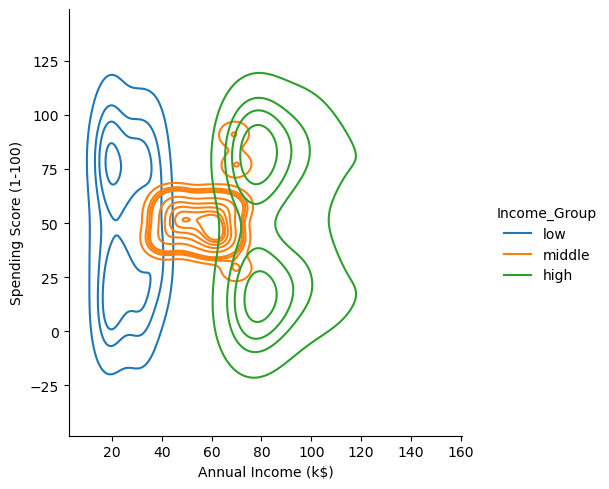

In [21]:
displot(data=customers, x="Annual Income (k$)", y="Spending Score (1-100)", kind='kde', hue='Income_Group')

plt.show()

From the kde plot, we can see again that spending score is more congested for the middle income group. The high and low income groups are more spread out suggesting variability of spending score.This suggests middle income groups people are more consistent in their spending than the other two groups.

---

**Problem 8**

This code will group the data into 5 different clusters, based on age and spending score.

```python
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=2024)
X = customers[['Age','Spending Score (1-100)']]
model.fit(X)
```

Show that incomes of the people in clusters 1 and 4 are very similar.

### Solution 8

In [22]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=2024)
X = customers[['Age','Spending Score (1-100)']]
model.fit(X)

KMeans(n_clusters=5, random_state=2024)

In [23]:
customers['cluster']= model.labels_

In [24]:
customers.groupby("cluster")['Annual Income (k$)'].mean()

cluster
0    54.147059
1    67.054054
2    54.512195
3    59.062500
4    65.446429
Name: Annual Income (k$), dtype: float64

From the mean income of the clusters, we can see that cluster 1 and 4 have very close income(67k and 65k).We can use a catplot to see their income chart as well.


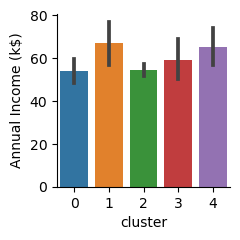

In [25]:
catplot(data=customers, y='Annual Income (k$)', x='cluster', kind='bar', height=2.5)

plt.show()

From the above catplot, we can see that the `annual income` of cluster 1 and 4 are very similar as well.
So, we can say that the annual income of cluster 1 and 4 are very similar both numerically and visually.

---

**Problem 9**

Suppose you need to provide business analytics to a company, do you recommend your company to attract people in cluster 1 or cluster 4?

### Solution 9

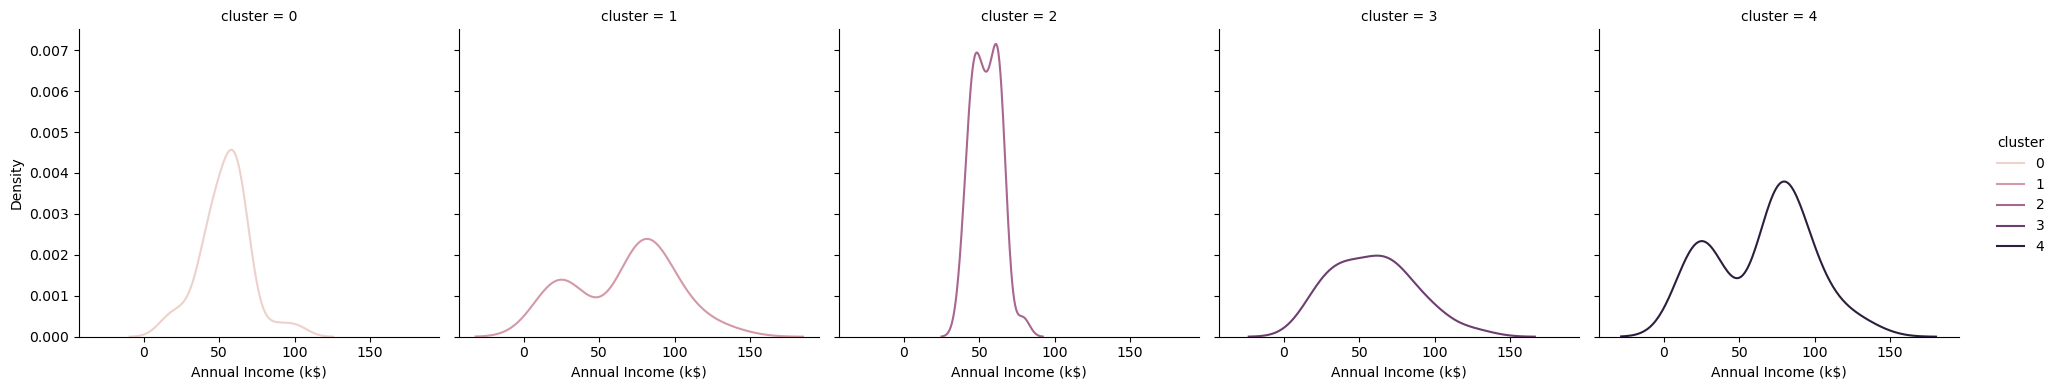

In [26]:
displot(data=customers, x='Annual Income (k$)', hue='cluster',col='cluster', kind='kde', height=4)

plt.show()

From the displot of cluster 1 and 4, we can see that the density of high spenders in more in cluster 4 than in cluster 1. Initially our inclination is to suggest cluster 4 customers. Lets look at their spending score for further clarification. 

In [27]:
customers.groupby("cluster")['Spending Score (1-100)'].mean()

cluster
0    53.823529
1    11.270270
2    49.731707
3    35.250000
4    82.607143
Name: Spending Score (1-100), dtype: float64

So , an important factor is a customers spending if we are suggesting a specific cluster group. Here, we can see that the `spending score` of cluster 4 is a lot higher than cluster 1.

Finally , from this analysis, i would suggest my company to attract customers from cluster 4.